# SVM

In SVMs, our main objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum margin hyperplane in the following 2 step process:

 - Generate hyperplanes which segregates the classes in the best possible way. There are many hyperplanes that might classify the data. We should look for the best hyperplane that represents the largest separation, or margin, between the two classes.

 - So, we choose the hyperplane so that distance from it to the support vectors on each side is maximized. If such a hyperplane exists, it is known as the maximum margin hyperplane and the linear classifier it defines is known as a maximum margin classifier.

In practice, SVM algorithm is implemented using a kernel. It uses a technique called the kernel trick. In simple words, a kernel is just a function that maps the data to a higher dimension where data is separable. A kernel transforms a low-dimensional input data space into a higher dimensional space. So, it converts non-linear separable problems to linear separable problems by adding more dimensions to it. Thus, the kernel trick helps us to build a more accurate classifier. Hence, it is useful in non-linear separation problems.

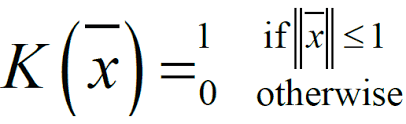

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import RandomState
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from scipy.stats import mode
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
sns.set()
from matplotlib.pyplot import rcParams

In [3]:
df = pd.read_csv('gender_classification_v7.csv', header = 0)
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
dummy=pd.get_dummies(df.gender, prefix='gender').iloc[:, 1:] 
#dummy.head(10)
data_new=pd.concat([df, dummy], axis=1)

data2=data_new.drop(['gender'],axis=1) 
data2.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender_Male
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
5,1,13.0,6.8,1,1,1,1,1
6,1,15.3,6.2,1,1,1,0,1
7,0,13.0,5.2,0,0,0,0,0
8,1,11.9,5.4,1,0,1,1,0
9,1,12.1,5.4,0,0,0,0,0


### distribution of labels

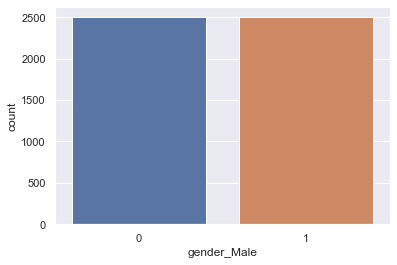

In [6]:
g = sns.countplot(data2['gender_Male'])
g.set_xticklabels(['0','1'])
plt.show()

In [7]:
y=data2['gender_Male']
X=data2.drop(['gender_Male'],axis=1)

It's a perfect balanced dataset, so no data augmented needed.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
#CreateSVM Object.
svclassifier = svm.SVC()
#Training the model.
svclassifier.fit(X_train, y_train)

#Predict test data set.
y_pred = svclassifier.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

#Checking performance our model with ROC Score.
print('roc score:',roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       518
           1       0.97      0.96      0.96       483

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001

roc score: 0.9657825527390745


The results look pretty good. Let's see the confusion matrix.

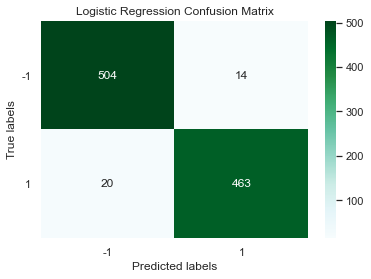

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
labels = ['-1','1']
sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='BuGn') 
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Logistic Regression Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360);

The recall rate and precision rate are both high enough. We don't do the standardization here since it's not always a good way when the predictors include both continuous and categorical variables.

## Visualization

To do the visualization, we select the forehead_width_cm and forehead_height_cm as our predictors and do the SVM classification again.

In [13]:
X_sub=data2[['forehead_width_cm','forehead_height_cm']]
X_train, X_test, y_train, y_test = train_test_split(X_sub, y, test_size = 0.2, random_state = 0)
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
#CreateSVM Object.
svclassifier = svm.SVC()
#Training the model.
svclassifier.fit(X_train, y_train)

#Predict test data set.
y_pred = svclassifier.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

#Checking performance our model with ROC Score.
print('roc score:',roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.88      0.77       518
           1       0.82      0.58      0.68       483

    accuracy                           0.73      1001
   macro avg       0.76      0.73      0.73      1001
weighted avg       0.75      0.73      0.73      1001

roc score: 0.728904370208718


We can see that if we only use these two predictors, the results will be worse. Since this is just for visualization, we don't do the model improvement here. Let's now visualize the decision boundary for the test set.

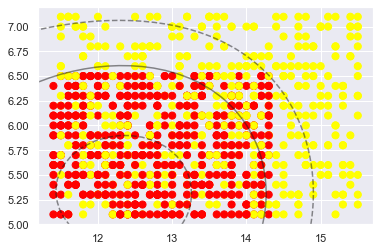

In [21]:
ax = plt.gca()
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, s=50, cmap='autumn')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

x_axis = np.linspace(xlim[0], xlim[1], 30)
y_axis = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(y_axis, x_axis)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svclassifier.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])


plt.show()

We can see that the decision functions in this model is not linear. Somehow we need can to some transformation of the dataset. In this case, polar coordinate transformation might be a good choice. However, it's hard to classify the labels in the solid circle since the "angle" can't tell us the difference between to classes in this case. That explains why the SVM model only including "forehead_height_cm" and "forehead_width_cm" has worse performance. 

But this plot shows some clues that our data might be separable in the high dimension and this partly exlains why the model with all predictors performes very well.